                             Heart Disease Probability Model
                        
Heart disease is the leading cause of death for men, women, and people of most racial and ethnic groups in the United States. One person dies every 37 seconds in the United States from cardiovascular disease. About 647,000 Americans die from heart disease each year, which is 1 in every 4 deaths. Heart disease costs the United States about $219 billion each year from 2014 to 2015. This includes the cost of health care services, medicines, and lost productivity due to death.
There are different root causes of the heart disease. There are a number of lifestyle choices that can increase the risk of heart disease. These include high blood pressure and cholesterol, smoking, overweight and obesity, diabetes, family history, diet of junk food, age, a history of preeclampsia during pregnancy, staying in a stationary position for extended periods of time. Having any of these risk factors greatly increases the risk of heart disease. 
In this project, we will use the heart data from Kaggle and combined with Supervised Machine Learning method to set up a model to predict the possibility of heart diseases. The link of Kaggle data is shown below:

First, please load the needed packages and modules into Python. Next, load the data into a pandas dataframe for ease of use.

In [1]:
import os
import pandas as pd
from datetime import datetime,timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import plotly.graph_objects as go
#from sklearn.experimental import enable_iterative_imputer
#from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor

In [2]:
url ='C:\\Users\\mohua\\OneDrive\\Documents\\capstone2\\heart_new.csv'
df = pd.read_csv(url)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [3]:
df.shape

(297, 14)

In [4]:
#Counts of null values 
na_df=pd.DataFrame(df.isnull().sum().sort_values(ascending=False)).reset_index()
na_df.columns = ['VarName', 'NullCount']
na_df[(na_df['NullCount']>0)]

,VarName,NullCount


In [5]:
#Check Missing Value
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [6]:
# Check data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [7]:
# Check more information
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [8]:
# Explanation of Data

#1 age

#2 sex

#3 cp: chest pain type (4 values)
#-- Value 0: asymptomatic
#-- Value 1: atypical angina
#-- Value 2: non-anginal pain
#-- Value 3: typical angina

#4 trestbps: resting blood pressure

#5 chol: serum cholestoral in mg/dl

#6 fbs: fasting blood sugar > 120 mg/dl

#7 restecg: resting electrocardiographic results (values 0,1,2)
#-- Value 0: showing probable or definite left ventricular hypertrophy by Estes' criteria
#-- Value 1: normal
#-- Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

#8 thalach: maximum heart rate achieved

#9 exnag: exercise induced angina

#10 oldpeak: ST depression induced by exercise relative to rest

#11 slope: the slope of the peak exercise ST segment
#--Value 0: downsloping; 
#--Value 1: flat; 
#-- Value 2: upsloping

#12 ca: number of major vessels (0-3) colored by flourosopy

#13 thal: 
# -- Value 0 = normal; 
# -- Value 1 = fixed defect; 
# -- Vlaue 2 = reversable defect 


#14 condition: heart disease: 
# -- Value 0 well people
# -- Value 1 heart disease 

In [9]:
# As the initial stage, the distribution of data needed to be examined
#Separation of the people with heart disease vs. well people. Use the condition=1 vs.condition=1
df_heart=df[df['condition']==1]
df_well=df[df['condition']==0]
print('There are ',len(df_heart), 'people with heart disease')
print('There are ',len(df_well), 'people without heart disease')

There are  137 people with heart disease
There are  160 people without heart disease


C:\Users\mohua\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


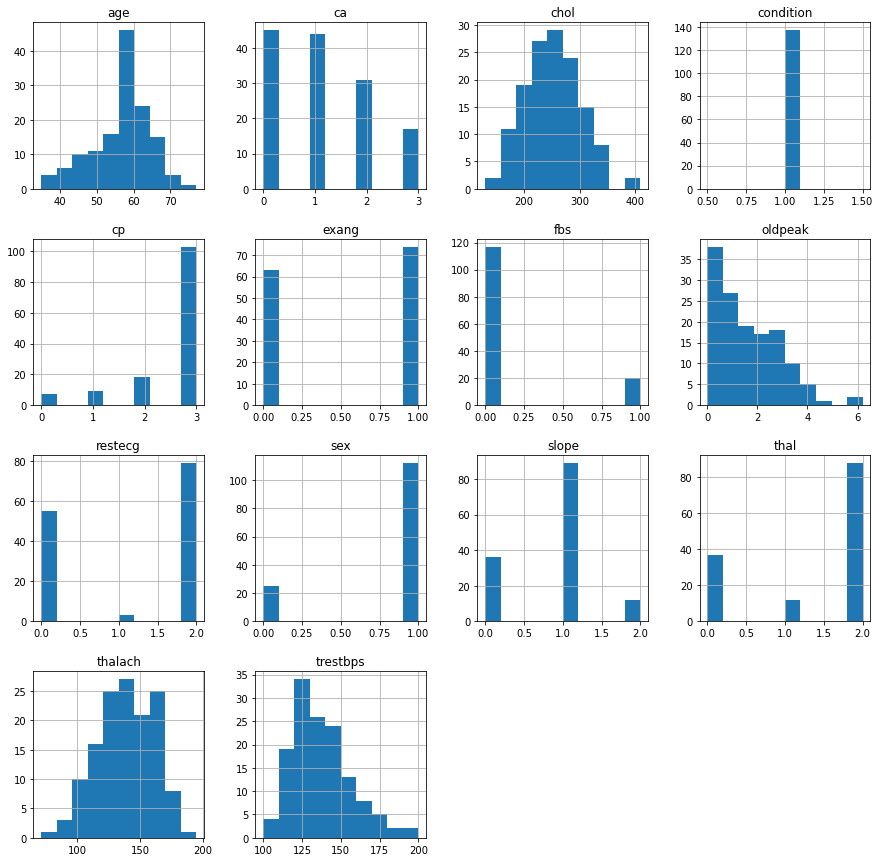

In [10]:
#check the distribution of the people with heart disease
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
df_heart.hist(ax=ax)
plt.show()

C:\Users\mohua\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


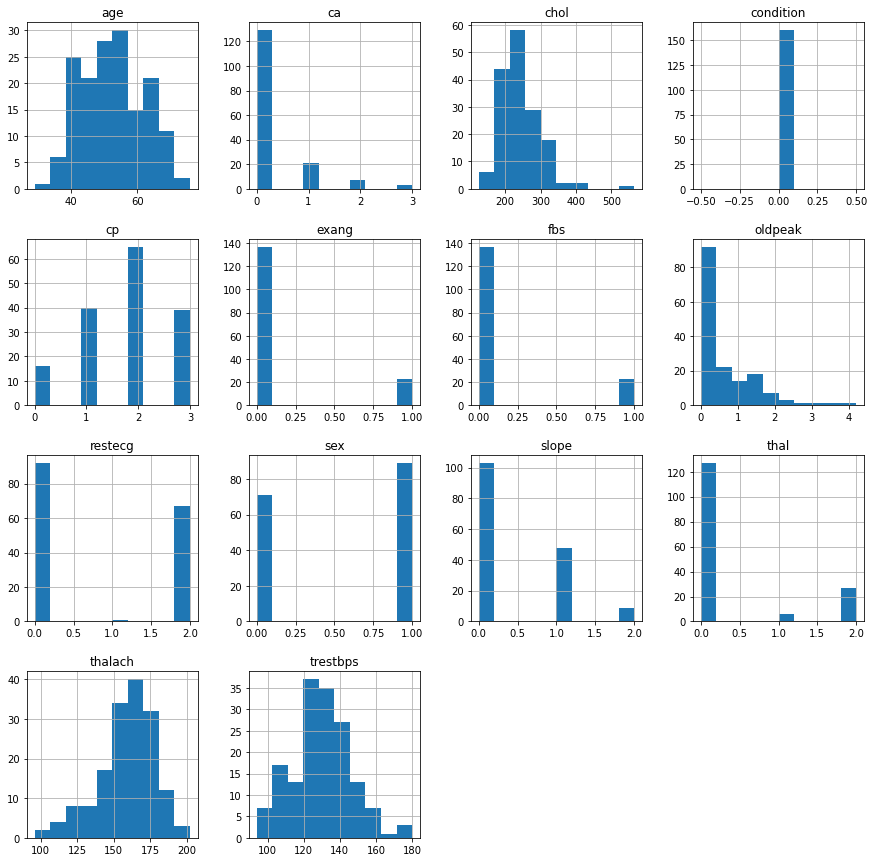

In [11]:
# Check the distribution of people without heart disease
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
df_well.hist(ax=ax)
plt.show()

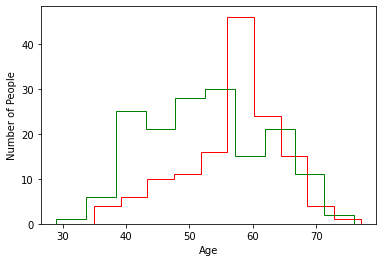

In [12]:
# As initial stage, investigate the distribition of the data
# The first one is the age.
plt.hist(df_heart['age'],histtype='step',color='red')
plt.hist(df_well['age'],histtype='step',color='green')
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.show()

# The green one is the age distribution of well people
# The red one is the distribution of the heart disease people
# The well people follow a normal distribution of age group. 
# The heart disease people showed the shift of max normal distribution. The distribution is narrower.
# The mean shifted from 55 to ~ 60.  the data showed that poeple at ~ 60 would like to have the heart disease

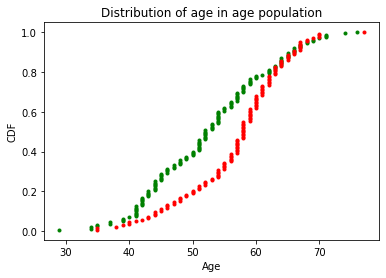

In [13]:
# The CDF is used to check the similarity of distribution of different samples. In this case,
# the CDF of two curve should be similar but should have some type of shifting if the data is reasonable
# define ECDF
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

#computer CDF
x_original,y_original=ecdf(df_well['age'])
x_yearly,y_yearly=ecdf(df_heart['age'])

plt.plot(x_original , y_original, marker='.',linestyle='none',color='green')
plt.plot(x_yearly , y_yearly, marker='.',linestyle='none',color='red')

_ = plt.xlabel('Age')
_ = plt.ylabel('CDF')
_ = plt.title('Distribution of age in age population')

# green is the well people. red is the heart disease people
# green and red line are very similar. So the data distribution was reasonable
# As we expected, there is a distribution difference in the center of the age. 
# The distribution was casued by the heart disease

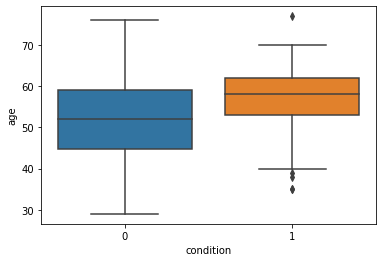

In [14]:
# Additional test is to use the boxplot to check the mean and outlier
sns.boxplot(x='condition', y='age', data=df)
plt.show()

# The blue color was the well people. The orange color was the people with heart disease
# The average age for the well people was 52. The average age for the heart disease people was 60
# The data showed that two data has the different standard deviation. 
# The people without heart disease has a wider distribution. 
# The people with heart disease has a tight distribution
# The result is similar to the above histogram 

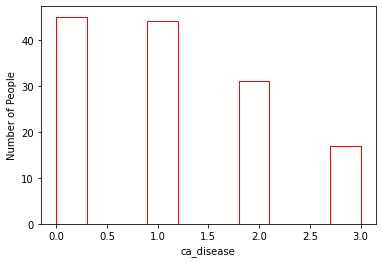

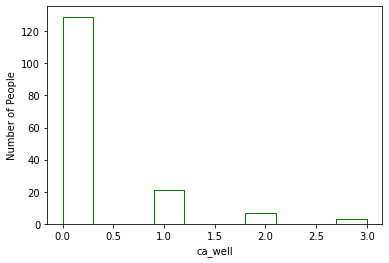

In [15]:
#Compare the ca: number of major vessels (0-3) colored by flourosopy
plt.hist(df_heart['ca'],histtype='step',color='red')
plt.xlabel('ca_disease')
plt.ylabel('Number of People')
plt.show()

plt.hist(df_well['ca'],histtype='step',color='green')
plt.xlabel('ca_well')
plt.ylabel('Number of People')
plt.show()

# Results showed that the majority of well people did not have the vessels to be colored. 
# However some people with heart disease would have vesssels to be colored

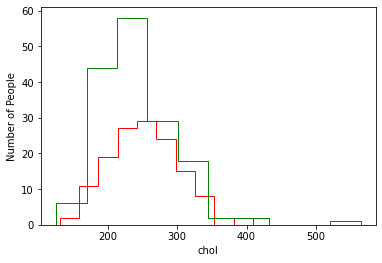

In [16]:
# Compare the cholestoral
plt.hist(df_heart['chol'],histtype='step',color='red')
plt.hist(df_well['chol'],histtype='step',color='green')
plt.xlabel('chol')
plt.ylabel('Number of People')
plt.show()

# The green line is the well people. The red line is people with heart disease
# Two chloestoral curves seems like a normal distribution 
# The cholestoral level of well people is 230 mg /dl, the chloestoral level of the heart people is ~ 250 mg /dL
# However whether this one is a significant difference?

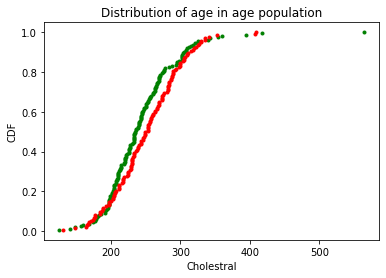

In [17]:
# define ECDF
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

#computer CDF
x_original,y_original=ecdf(df_well['chol'])
x_yearly,y_yearly=ecdf(df_heart['chol'])

plt.plot(x_original , y_original, marker='.',linestyle='none',color='green')
plt.plot(x_yearly , y_yearly, marker='.',linestyle='none',color='red')

_ = plt.xlabel('Cholestral')
_ = plt.ylabel('CDF')
_ = plt.title('Distribution of age in age population')

# The green line is the well people. The red line is the people with heart disease
# green and red line are very similar, which indicated that the change was very minor
# As we expected, there is a slightly distribution difference,but whether is a significant value? Maybe

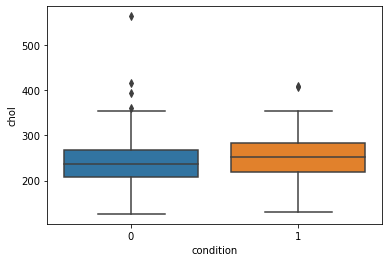

In [18]:
#Additional test is to use the boxplot to check the mean and outlier
sns.boxplot(x='condition', y='chol', data=df)
plt.show()

# The blue is the well people and the orange is the people with heart disease
# The result is similar to the above histogram. 
# The chlorestral in the people with heart disease vs. well people was not very high.
# The data showed that two data has the similar standard deviation. 
# Therefore cholestral may not be a good indication

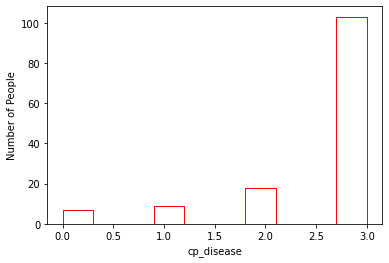

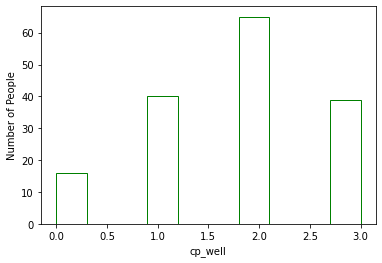

In [19]:
# Compare cp: the chest pain
plt.hist(df_heart['cp'],histtype='step',color='red')
plt.xlabel('cp_disease')
plt.ylabel('Number of People')
plt.show()

plt.hist(df_well['cp'],histtype='step',color='green')
plt.xlabel('cp_well')
plt.ylabel('Number of People')
plt.show()

# The green line is the well people. The read line is the people with heart disease.
# The people with heart diseases mainly on the level 3 chest pain
# The well people will have level 1 to 3 chest pain, more similar to a normal distribution curve

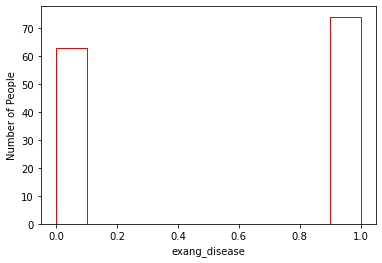

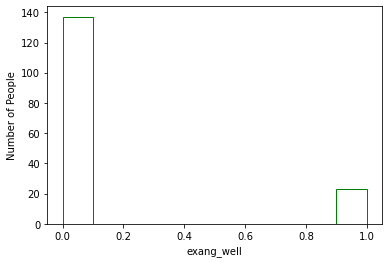

In [20]:
# compare with examine exercise induced angina
plt.hist(df_heart['exang'],histtype='step',color='red')
plt.xlabel('exang_disease')
plt.ylabel('Number of People')
plt.show()

plt.hist(df_well['exang'],histtype='step',color='green')
plt.xlabel('exang_well')
plt.ylabel('Number of People')
plt.show()

# The green line is the well people. The red line is the people with heart disease
# The people with heart diseases has more positive response to exercise induced angina than well people

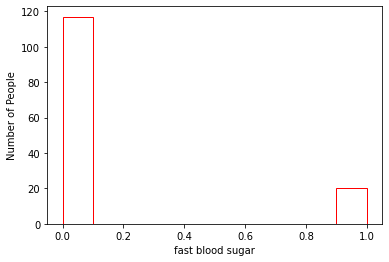

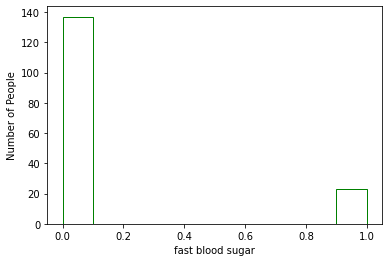

In [21]:
# Compare fast blood sugar > 120 mg /dL
plt.hist(df_heart['fbs'],histtype='step',color='red')
plt.xlabel('fast blood sugar')
plt.ylabel('Number of People')
plt.show()

plt.hist(df_well['fbs'],histtype='step',color='green')
plt.xlabel('fast blood sugar')
plt.ylabel('Number of People')
plt.show()

# Green line is the well people. The red line is the people with heart disease
# Results showed that fast blood sugar did not affect the heart disease

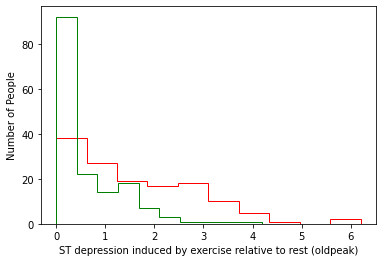

In [22]:
#Comare oldpeak = ST depression induced by exercise relative to rest
plt.hist(df_heart['oldpeak'],histtype='step',color='red')
plt.hist(df_well['oldpeak'],histtype='step',color='green')
plt.xlabel('ST depression induced by exercise relative to rest (oldpeak)')
plt.ylabel('Number of People')
plt.show()

# The green one is the well people. The red one is the heart disease people
# There are people in ST depression induced by exercise with heart disease than rest for well people

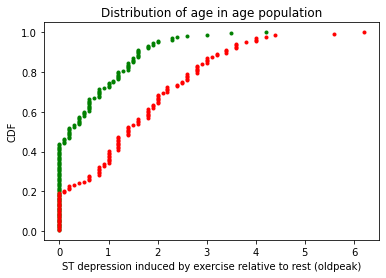

In [23]:
# define ECDF
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

#computer CDF
x_original,y_original=ecdf(df_well['oldpeak'])
x_yearly,y_yearly=ecdf(df_heart['oldpeak'])

plt.plot(x_original , y_original, marker='.',linestyle='none',color='green')
plt.plot(x_yearly , y_yearly, marker='.',linestyle='none',color='red')

_ = plt.xlabel('ST depression induced by exercise relative to rest (oldpeak)')
_ = plt.ylabel('CDF')
_ = plt.title('Distribution of age in age population')

# The green one is the well people. The rea one is the people with heart disease.
# The trend of green and red line are very similar. 
# As expected, there are people in ST depression induced by exercise with heart disease than rest for well people

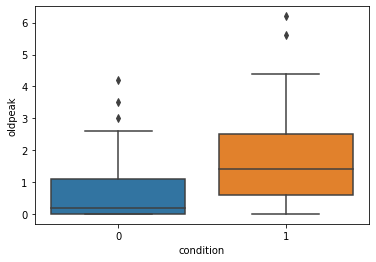

In [24]:
#Additional test is to use the boxplot to check the mean and outlier
sns.boxplot(x='condition', y='oldpeak', data=df)
plt.show()

# The data showed that two data has the different standard deviation. 
# The result is similar to the above histogram. The heart disease people has at least some sort of depression

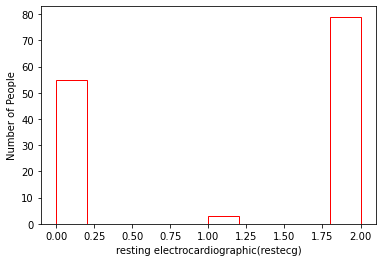

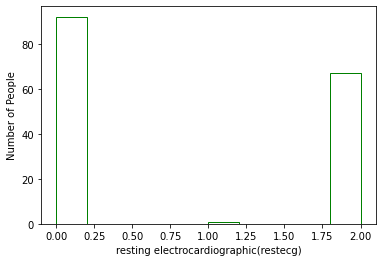

In [25]:
#Compare restecg: resting electrocardiographic results (values 0,1,2)
plt.hist(df_heart['restecg'],histtype='step',color='red')
plt.xlabel('resting electrocardiographic(restecg)')
plt.ylabel('Number of People')
plt.show()

plt.hist(df_well['restecg'],histtype='step',color='green')
plt.xlabel('resting electrocardiographic(restecg)')
plt.ylabel('Number of People')
plt.show()

# green one is the well people. The red one is the people with heart disease
# There are slightly distribution differences between well people and people with heart disease

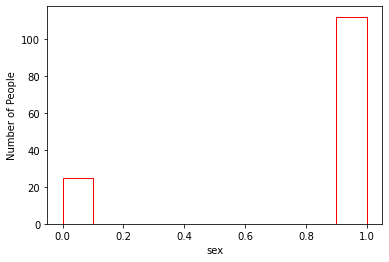

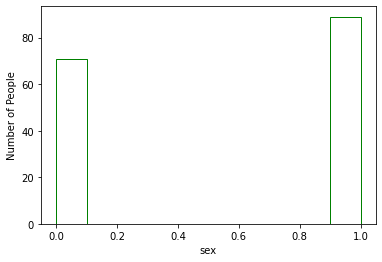

In [26]:
#Compare xex
plt.hist(df_heart['sex'],histtype='step',color='red')
plt.xlabel('sex')
plt.ylabel('Number of People')
plt.show()

plt.hist(df_well['sex'],histtype='step',color='green')
plt.xlabel('sex')
plt.ylabel('Number of People')
plt.show()

# The green one is the well people. The red one is the people with heart disease
# The results indicated that the male tend to have a little bit more tendency to have heart disease. But it is not that significatn

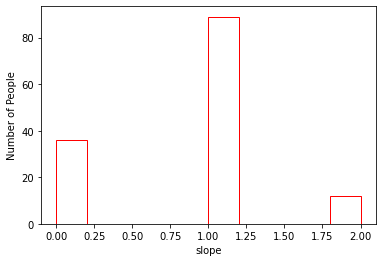

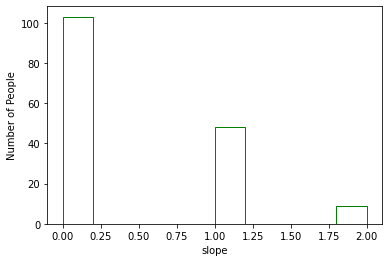

In [27]:
#Compare #11 slope: the slope of the peak exercise ST segment
#--Value 0: downsloping; 
#--Value 1: flat; 
#-- Value 2: upsloping

plt.hist(df_heart['slope'],histtype='step',color='red')
plt.xlabel('slope')
plt.ylabel('Number of People')
plt.show()

plt.hist(df_well['slope'],histtype='step',color='green')
plt.xlabel('slope')
plt.ylabel('Number of People')
plt.show()

# green one is the well people. The red one is the people with heart disease
# The Results showed that the shift of people with heart diseases from downsloping to upslopeing

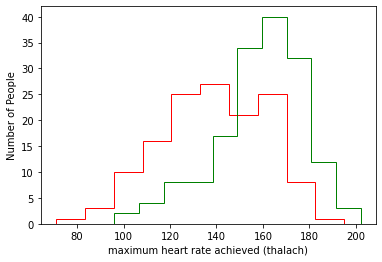

In [28]:
# Compare with thalach: maximum heart rate achieved
plt.hist(df_heart['thalach'],histtype='step',color='red')
plt.hist(df_well['thalach'],histtype='step',color='green')
plt.xlabel('maximum heart rate achieved (thalach)')
plt.ylabel('Number of People')
plt.show()

# The green one is the age distribution of well people. The red one is the distribution of the heart disease people
# Both samples follow a normal distribution of the samples
# The people with heart disease tend to have lower maximum heart rate

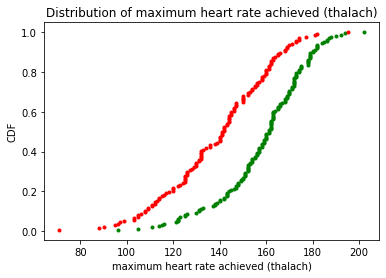

In [29]:
# define ECDF
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

#computer CDF
x_original,y_original=ecdf(df_well['thalach'])
x_yearly,y_yearly=ecdf(df_heart['thalach'])

plt.plot(x_original , y_original, marker='.',linestyle='none',color='green')
plt.plot(x_yearly , y_yearly, marker='.',linestyle='none',color='red')

_ = plt.xlabel('maximum heart rate achieved (thalach)')
_ = plt.ylabel('CDF')
_ = plt.title('Distribution of maximum heart rate achieved (thalach)')

# The green line is well people. The red line is people with heart disease. 
# The results indicated that the people has heart disease has less maximum heart rate (thalach)

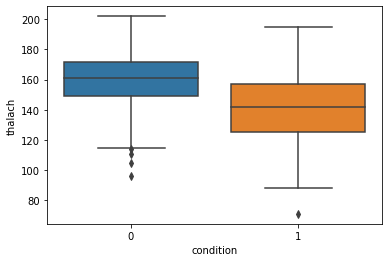

In [30]:
#Additional test is to use the boxplot to check the mean and outlier
sns.boxplot(x='condition', y='thalach', data=df)
plt.show()

# The blue is the well people. The orange is the people with heart disease
# The result is similar to the above histogram. The heart disease people tend to have less maximum heart rate

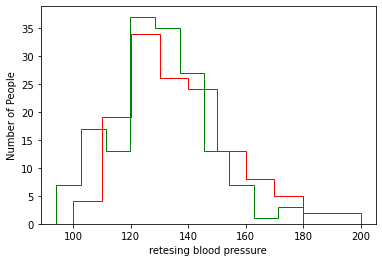

In [31]:
# Compare trestbps: resting blood pressure
plt.hist(df_heart['trestbps'],histtype='step',color='red')
plt.hist(df_well['trestbps'],histtype='step',color='green')
plt.xlabel('retesing blood pressure')
plt.ylabel('Number of People')
plt.show()

# The green one is the age distribution of well people. The red one is the distribution of the heart disease people
# Both people follows the normal distribution
# There is very small shift of the retesting blood pressure

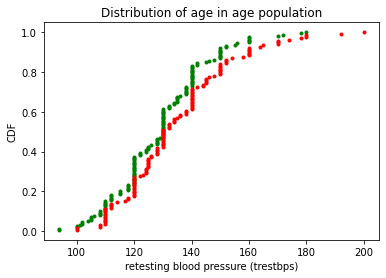

In [32]:
# define ECDF
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

#computer CDF
x_original,y_original=ecdf(df_well['trestbps'])
x_yearly,y_yearly=ecdf(df_heart['trestbps'])

plt.plot(x_original , y_original, marker='.',linestyle='none',color='green')
plt.plot(x_yearly , y_yearly, marker='.',linestyle='none',color='red')

_ = plt.xlabel('retesting blood pressure (trestbps)')
_ = plt.ylabel('CDF')
_ = plt.title('Distribution of age in age population')

# The green line is well people. The red line is the people with heart disease
# The blod pressure data indicated a small shift of the mean

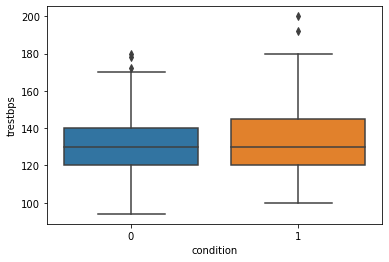

In [33]:
#Additional test is to use the boxplot to check the mean and outlier
sns.boxplot(x='condition', y='trestbps', data=df)
plt.show()

# The blue is the well people. The orange is the people with heart disease
# The result is similar to the above histogram. The heart disease people has a slightly low blood pressure than well people

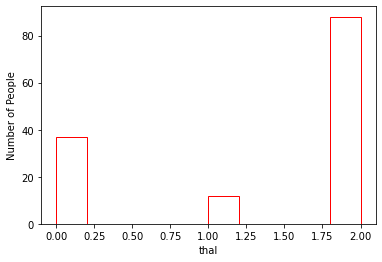

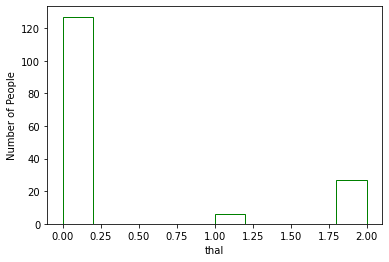

In [34]:
# Compare thal
plt.hist(df_heart['thal'],histtype='step',color='red')
plt.xlabel('thal')
plt.ylabel('Number of People')
plt.show()

plt.hist(df_well['thal'],histtype='step',color='green')
plt.xlabel('thal')
plt.ylabel('Number of People')
plt.show()


# The green one is the age distribution of well people. The red one is the distribution of the heart disease people
# There is very small shift of Thal from normal to the high value

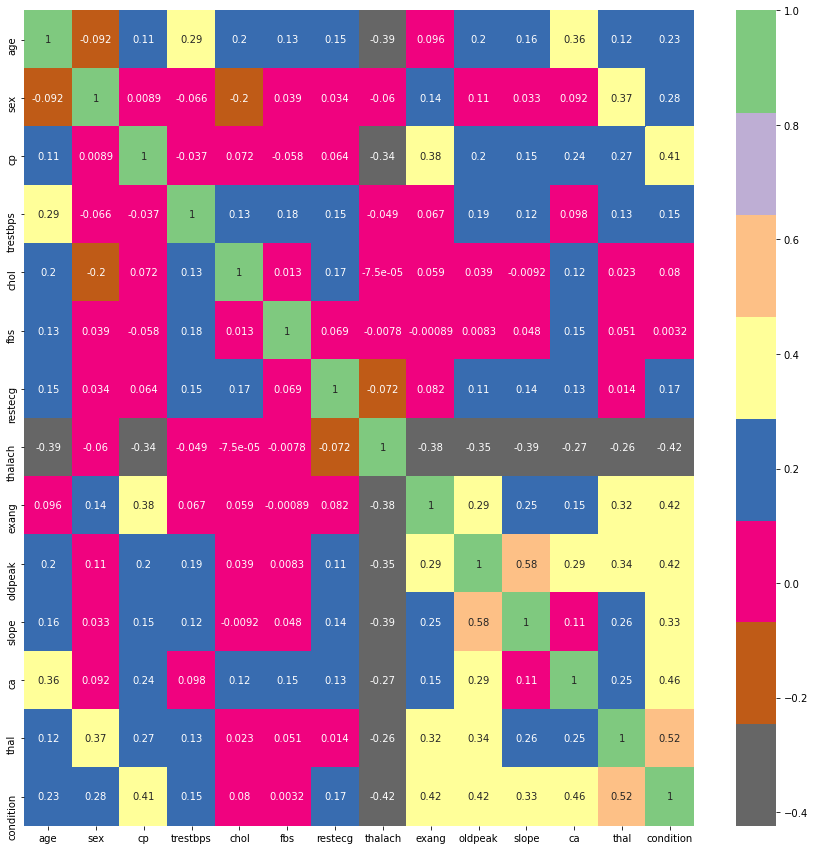

In [35]:
#Check the relationship between all the varoables
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
sns.heatmap(df.corr(),cmap='Accent_r',annot=True,ax=ax)

# What we mainly focused in the heatmap are the condition(potential to have the heart disease) and other variables
# Results showed that heart disease positive related to the cp(chest pain),resting blood pressure,

In [36]:
# The following will be the modeling

In [37]:
X=df.drop(columns=['condition'])
y=df['condition']

from sklearn.model_selection import train_test_split

# dont forget to define your X and y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [38]:
#scale data
from sklearn import preprocessing
import numpy as np
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

C:\Users\mohua\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\mohua\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\mohua\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys
